<a href="https://colab.research.google.com/github/abhijit2512/IOT-PROJECT/blob/main/BIGDATA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Colab compatibility setup (safe to run elsewhere)
try:
    from google.colab import drive
    # drive.mount('/content/drive')  # Uncomment if using Google Drive data
except Exception:
    pass
import os, sys
print('Runtime OK. Python', sys.version.split()[0])


<a href="https://colab.research.google.com/github/abhijit2512/IOT-PROJECT/blob/main/BIGDATA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install openpyxl to read Excel if not already
!pip install openpyxl

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
# Load Excel files (update the filenames if needed)
deaths = pd.read_excel("/content/Deaths by IMD 2001-2022 FINAL.xlsx")
imd_deaths = pd.read_excel("/content/IMD_Death Data_England_1993_2022.xlsx")

# Quick look at the first few rows
print("Deaths file:")
display(deaths.head())

print("IMD file:")
display(imd_deaths.head())


Deaths file:


,Link to contents sheet
0,"Deaths by sex, single year of age, underlying ..."
1,About ONS
2,We are the executive office of the UK Statisti...
3,Information about ONS mortality data
4,Deaths occurring in England and Wales are regi...


IMD file:


,Link to contents sheet
0,"Death registrations by sex, five year age grou..."
1,About ONS
2,We are the executive office of the UK Statisti...
3,Information about ONS mortality data
4,Deaths occurring in England and Wales are regi...


In [ ]:
from google.colab import files

# Upload files manually (you’ll get a “Choose File” button)
uploaded = files.upload()


TypeError: 'NoneType' object is not subscriptable

In [ ]:
# Load the uploaded files into pandas
deaths = pd.read_excel("Deaths by IMD 2001-2022 FINAL.xlsx")
imd_deaths = pd.read_excel("IMD_Death Data_England_1993_2022.xlsx")

# Quick look at first few rows
print("Deaths dataset:")
display(deaths.head())

print("IMD dataset:")
display(imd_deaths.head())


In [ ]:
# Reshape the deaths dataset into long format
dea_long = deaths.melt(
    id_vars=[c for c in deaths.columns if c in ["imd_decile","icd10","age"]],
    var_name="year",
    value_name="deaths"
)

# Reshape the IMD dataset into long format
imd_long = imd_deaths.melt(
    id_vars=[c for c in imd_deaths.columns if c in ["imd_decile"]],
    var_name="year",
    value_name="imd_value"
)

# Quick preview
print("Deaths reshaped:")
display(dea_long.head())

print("IMD reshaped:")
display(imd_long.head())


In [ ]:
# Reload Excel, skip the first rows that are just notes
deaths = pd.read_excel("Deaths by IMD 2001-2022 FINAL.xlsx", sheet_name=0, skiprows=5)
imd_deaths = pd.read_excel("IMD_Death Data_England_1993_2022.xlsx", sheet_name=0, skiprows=5)

print("Deaths file:")
display(deaths.head())

print("IMD file:")
display(imd_deaths.head())



In [ ]:
# Try skipping more rows (adjust the number until the top looks clean)
deaths = pd.read_excel("Deaths by IMD 2001-2022 FINAL.xlsx", skiprows=10)
imd_deaths = pd.read_excel("IMD_Death Data_England_1993_2022.xlsx", skiprows=10)

print("Deaths file:")
display(deaths.head(10))

print("IMD file:")
display(imd_deaths.head(10))


In [ ]:
import pandas as pd
import re

def read_table_auto(path, sheet_name=0, search_years=range(1990, 2030)):
    # peek first 60 rows to find the true header row
    tmp = pd.read_excel(path, sheet_name=sheet_name, header=None, nrows=60, engine="openpyxl")
    header_row = None

    # helper: a row is header if it has 'imd' or 'decile' or any year like 2001…2022
    year_re = re.compile(r'^(19|20)\d{2}$')
    for i in range(len(tmp)):
        row_vals = tmp.loc[i].astype(str).str.strip().str.lower()
        has_imd = row_vals.str.contains(r'\bimd\b|\bdecile\b').any()
        has_year = row_vals.isin([str(y) for y in search_years]).any()
        if has_imd or has_year:
            header_row = i
            break

    if header_row is None:
        raise ValueError("Could not find a header row—open the file and tell me which row number has the column names.")

    # now read the sheet using the detected header row
    df = pd.read_excel(path, sheet_name=sheet_name, header=header_row, engine="openpyxl")
    # drop empty columns
    df = df.dropna(axis=1, how="all")
    # standardise column names
    df.columns = [str(c).strip().lower().replace(" ", "_") for c in df.columns]
    return df, header_row

# ---- use it on your two files ----
deaths, hdr_deaths = read_table_auto("Deaths by IMD 2001-2022 FINAL.xlsx")
imd_deaths, hdr_imd   = read_table_auto("IMD_Death Data_England_1993_2022.xlsx")

print("Header row (deaths):", hdr_deaths)
display(deaths.head(10))
print("Header row (imd):", hdr_imd)
display(imd_deaths.head(10))


In [ ]:
import pandas as pd
import openpyxl

with pd.ExcelFile("Deaths by IMD 2001-2022 FINAL.xlsx") as xls:
    print("DEATHS sheets:", xls.sheet_names)
with pd.ExcelFile("IMD_Death Data_England_1993_2022.xlsx") as xls:
    print("IMD sheets:", xls.sheet_names)


In [ ]:
import pandas as pd
import re

def load_imd_sheet(path, sheet_name="IMD"):
    # peek first 50 rows to find the row that looks like real headers
    peek = pd.read_excel(path, sheet_name=sheet_name, header=None, nrows=50, engine="openpyxl")
    header_row = None
    year_pat = re.compile(r'^(19|20)\d{2}$')

    for i in range(len(peek)):
        row = peek.loc[i].astype(str).str.strip()
        low = row.str.lower()
        has_imd = low.str.contains(r'\bimd\b|\bdecile\b').any()
        has_year = low.isin([str(y) for y in range(1990,2030)]).any() or row.apply(lambda x: bool(year_pat.match(x))).any()
        if has_imd or has_year:
            header_row = i
            break

    if header_row is None:
        raise ValueError("Couldn't find header row—open sheet and tell me which row has column names.")

    df = pd.read_excel(path, sheet_name=sheet_name, header=header_row, engine="openpyxl")
    df = df.dropna(axis=1, how="all")
    df.columns = [str(c).strip().lower().replace(" ", "_") for c in df.columns]
    return df, header_row

# Use it on your two files
deaths, hdr_deaths = load_imd_sheet("Deaths by IMD 2001-2022 FINAL.xlsx", "IMD")
imd_deaths, hdr_imd = load_imd_sheet("IMD_Death Data_England_1993_2022.xlsx", "IMD")

print("Header row used (DEATHS):", hdr_deaths)
display(deaths.head(5))
print("Header row used (IMD):", hdr_imd)
display(imd_deaths.head(5))


In [ ]:
import pandas as pd, re

def try_load(path, sheet_name):
    # scan more rows because notes can be long
    peek = pd.read_excel(path, sheet_name=sheet_name, header=None, nrows=200, engine="openpyxl")
    header_row = None
    year_pat = re.compile(r'^(19|20)\d{2}$')
    for i in range(len(peek)):
        row = peek.loc[i].astype(str).str.strip()
        low = row.str.lower()
        has_imd = low.str.contains(r'index of multiple deprivation|^imd$|imd\b|decile').any()
        has_year = low.isin([str(y) for y in range(1990,2031)]).any() or row.apply(lambda x: bool(year_pat.match(x))).any()
        # a header row usually has both labels like imd/decile and at least one year
        if has_year or has_imd:
            header_row = i
            break
    if header_row is None:
        return None, None, None
    df = pd.read_excel(path, sheet_name=sheet_name, header=header_row, engine="openpyxl")
    df = df.dropna(axis=1, how="all")
    # standardise col names for inspection
    cols_raw = list(df.columns)
    df.columns = [str(c).strip().lower().replace(" ", "_") for c in df.columns]
    return df, header_row, cols_raw

def scan_numbered_sheets(path, label):
    with pd.ExcelFile(path) as xls:
        cand = [s for s in xls.sheet_names if s.strip().isdigit()]  # only "1","2","3",...
    print(f"\n{label}: numbered sheets found -> {cand}\n")
    results = []
    for s in cand:
        df, hdr, cols_raw = try_load(path, s)
        if df is None:
            print(f"Sheet {s}: could not find header within first 200 rows — skipping.")
            continue
        # look for any year-like columns after cleaning
        year_cols = [c for c in df.columns if re.fullmatch(r'(19|20)\d{2}', c)]
        has_imd_col = any('imd' in c or 'decile' in c for c in df.columns)
        print(f"Sheet {s}: header row {hdr}; imd/decile col? {has_imd_col}; #year cols: {len(year_cols)}")
        print("First 5 column names:", df.columns[:5].tolist())
        display(df.head(5))
        results.append((s, hdr, df.columns.tolist()))
    return results

# ---- scan both workbooks ----
res_deaths = scan_numbered_sheets("Deaths by IMD 2001-2022 FINAL.xlsx", "DEATHS file")
res_imd    = scan_numbered_sheets("IMD_Death Data_England_1993_2022.xlsx", "IMD file")


In [ ]:
import pandas as pd

# ------------------------------
# 1. Helper function to load Excel sheet correctly
# ------------------------------
def load_clean_excel(path, sheet_name, header_row, skiprows=None):
    """
    path: file path
    sheet_name: name of sheet to read
    header_row: which row should be treated as column headers
    skiprows: optional extra rows to skip before/after headers
    """
    df = pd.read_excel(
        path,
        sheet_name=sheet_name,
        header=header_row,
        skiprows=skiprows
    )
    # Drop completely empty rows/cols
    df = df.dropna(axis=0, how="all")
    df = df.dropna(axis=1, how="all")

    # Reset index
    df = df.reset_index(drop=True)

    # Clean column names
    df.columns = [str(c).strip().replace("\n", "_").replace(" ", "_") for c in df.columns]

    return df

# ------------------------------
# 2. Load your files with correct header row
# ------------------------------
# From your screenshot:
# For DEATHS sheet, actual headers start at row 2 (zero-indexed in Excel → pandas header=2)
# For IMD sheet, actual headers start at row 1 (pandas header=1)

deaths_df = load_clean_excel("Deaths by IMD 2001-2022 FINAL.xlsx", "IMD", header_row=2)
imd_df = load_clean_excel("IMD Death Data England 1993_2022.xlsx", "IMD", header_row=1)

# ------------------------------
# 3. Inspect cleaned data
# ------------------------------
print("Deaths dataset:")
print(deaths_df.head(10))

print("\nIMD dataset:")
print(imd_df.head(10))



In [ ]:
import os, glob
print(os.listdir("/content"))



In [ ]:
import glob

# Try exact names first
DEATHS_PATH = "Deaths by IMD 2001-2022 FINAL.xlsx"
IMD_PATH    = "IMD_Death Data_England_1993_2022.xlsx"

# Fallback: if a file isn't found, try a pattern match
if not glob.glob(DEATHS_PATH):
    DEATHS_PATH = glob.glob("*Deaths*IMD*2001*2022*.*")[0]
if not glob.glob(IMD_PATH):
    IMD_PATH = glob.glob("IMD*Death*England*1993*2022*.*")[0]

DEATHS_PATH, IMD_PATH


In [ ]:
import pandas as pd

def load_clean_excel(path, sheet_name, header_row, skiprows=None):
    df = pd.read_excel(path, sheet_name=sheet_name, header=header_row, skiprows=skiprows, engine="openpyxl")
    df = df.dropna(axis=0, how="all").dropna(axis=1, how="all").reset_index(drop=True)
    df.columns = [str(c).strip().replace("\n"," ").replace("  "," ").replace(" ","_").lower() for c in df.columns]
    return df

# From your earlier preview, these header rows worked as a starting point:
deaths_df = load_clean_excel(DEATHS_PATH, sheet_name="IMD", header_row=2)
imd_df    = load_clean_excel(IMD_PATH,    sheet_name="IMD", header_row=1)

display(deaths_df.head(10))
display(imd_df.head(10))


In [ ]:
import pandas as pd
import re

DEATHS_PATH = "Deaths by IMD 2001-2022 FINAL.xlsx"
IMD_PATH    = "IMD_Death Data_England_1993_2022.xlsx"

# We’ll use the numbered sheets (they usually hold the tables)
SHEET_DEATHS = "1"
SHEET_IMD    = "1"   # if this doesn’t work, try "2", "3", ... later

def find_header_row(path, sheet):
    # scan first 200 rows to detect the real header row
    peek = pd.read_excel(path, sheet_name=sheet, header=None, nrows=200, engine="openpyxl")
    year_pat = re.compile(r'^(19|20)\d{2}$')
    for i in range(len(peek)):
        row = peek.loc[i].astype(str).str.strip()
        low = row.str.lower()
        # signals of a header row
        has_imd = low.str.contains(r'index of multiple deprivation|^imd$|imd\b|decile').any()
        has_year = row.apply(lambda x: bool(year_pat.match(str(x)))).any()
        many_years_next = False
        if i+1 < len(peek):
            nextrow = peek.loc[i+1].astype(str).str.strip()
            many_years_next = sum(nextrow.apply(lambda x: bool(year_pat.match(str(x))))) >= 5
        if has_imd or has_year or many_years_next:
            return i
    return None

hdr_deaths = find_header_row(DEATHS_PATH, SHEET_DEATHS)
hdr_imd    = find_header_row(IMD_PATH,    SHEET_IMD)

print("Detected header rows → deaths:", hdr_deaths, "  imd:", hdr_imd)

# Load using the detected header rows
deaths_df = pd.read_excel(DEATHS_PATH, sheet_name=SHEET_DEATHS, header=hdr_deaths, engine="openpyxl")
imd_df    = pd.read_excel(IMD_PATH,    sheet_name=SHEET_IMD,    header=hdr_imd,    engine="openpyxl")

# Drop empty cols/rows and tidy names
deaths_df = deaths_df.dropna(axis=1, how="all").dropna(axis=0, how="all")
imd_df    = imd_df.dropna(axis=1, how="all").dropna(axis=0, how="all")
deaths_df.columns = [str(c).strip().lower().replace("\n"," ").replace("  "," ").replace(" ","_") for c in deaths_df.columns]
imd_df.columns    = [str(c).strip().lower().replace("\n"," ").replace("  "," ").replace(" ","_") for c in imd_df.columns]

print("Deaths columns (first 12):", list(deaths_df.columns)[:12])
print("IMD columns (first 12):", list(imd_df.columns)[:12])
display(deaths_df.head(5))
display(imd_df.head(5))


In [ ]:
import pandas as pd

# Load deaths file (2001–2022), skipping metadata
deaths_df = pd.read_excel(
    "Deaths by IMD 2001-2022 FINAL.xlsx",
    sheet_name="IMD",       # make sure it's the correct sheet
    header=4                # skips first 4 rows, row 5 becomes header
)

# Load IMD file (1993–2022), skipping metadata
imd_df = pd.read_excel(
    "IMD Death Data England 1993_2022.xlsx",
    sheet_name="IMD",       # make sure it's the correct sheet
    header=4                # adjust if needed
)

print(deaths_df.head())
print(imd_df.head())


In [ ]:
import pandas as pd

# ================================
# 1. Upload files from your computer
# ================================
from google.colab import files

uploaded = files.upload()  # Choose your Excel files when prompted

# Example: If you upload "Deaths by IMD 2001-2022 FINAL.xlsx" and "IMD Data England 1993-2022.xlsx"
deaths_file = "Deaths by IMD 2001-2022 FINAL.xlsx"
imd_file = "IMD Data England 1993-2022.xlsx"

# ================================
# 2. Load DEATHS dataset (skip metadata rows)
# ================================
deaths = pd.read_excel(
    deaths_file,
    sheet_name="IMD",    # ✅ adjust sheet name if different
    skiprows=4           # ✅ skips metadata rows above the table
)

# ================================
# 3. Load IMD dataset (skip metadata rows)
# ================================
imd = pd.read_excel(
    imd_file,
    sheet_name="IMD decile",  # ✅ adjust sheet name if different
    skiprows=4
)

# ================================
# 4. Quick inspection
# ================================
print("Deaths first rows:\n", deaths.head(10))
print("\nIMD first rows:\n", imd.head(10))

# ================================
# 5. Clean column names
# ================================
deaths.columns = deaths.columns.str.strip().str.lower().str.replace(" ", "_")
imd.columns = imd.columns.str.strip().str.lower().str.replace(" ", "_")

# ================================
# 6. Reshape datasets (long format)
# ================================
# Reshape DEATHS (year vs value)
deaths_long = deaths.melt(
    id_vars=[deaths.columns[0]],     # usually "IMD decile" or "year"
    var_name="year",
    value_name="deaths"
)

# Reshape IMD (year vs value)
imd_long = imd.melt(
    id_vars=[imd.columns[0]],        # usually "IMD decile" or "year"
    var_name="year",
    value_name="imd_value"
)

# ================================
# 7. Merge datasets
# ================================
merged = pd.merge(
    deaths_long,
    imd_long,
    on=["year"],      # join by year
    how="inner"       # only keep years present in both
)

# ================================
# 8. Save cleaned dataset
# ================================
merged.to_csv("cleaned_dataset.csv", index=False)
print("✅ Clean dataset saved as 'cleaned_dataset.csv'")
print(merged.head(20))


In [ ]:
print("Deaths columns:", deaths_df.columns.tolist())
print("IMD columns:", imd_df.columns.tolist())

In [ ]:
import pandas as pd
from google.colab import files

# Upload your Excel files from your computer
uploaded = files.upload()

# See the exact filenames Colab received (copy them exactly later)
list(uploaded.keys())


Saving Deaths by IMD 2001-2022 FINAL.xlsx to Deaths by IMD 2001-2022 FINAL (2).xlsx
Saving IMD_Death Data_England_1993_2022.xlsx to IMD_Death Data_England_1993_2022 (2).xlsx


['Deaths by IMD 2001-2022 FINAL (2).xlsx',
 'IMD_Death Data_England_1993_2022 (2).xlsx']

In [ ]:
# ================================
# Step 2: Load DEATHS dataset
# ================================

deaths_file = "Deaths by IMD 2001-2022 FINAL (2).xlsx"   # use EXACT filename from upload list

deaths = pd.read_excel(
    deaths_file,
    sheet_name="IMD",   # ✅ adjust if sheet name is different
    skiprows=4          # ✅ skips top metadata rows
)

print("Deaths dataset preview:\n", deaths.head(10))


Deaths dataset preview:
   This worksheet contains one table.   Unnamed: 1
0            Death registration year  IMD version
1                       2001 to 2003         2004
2                       2004 to 2006         2007
3                       2007 to 2010         2010
4                       2011 to 2015         2015
5                       2016 to 2020         2019


In [ ]:
import pandas as pd

# List all sheet names in the Deaths file
deaths_file = "Deaths by IMD 2001-2022 FINAL (2).xlsx"
xls = pd.ExcelFile(deaths_file)
print("Available sheets:\n", xls.sheet_names)


Available sheets:
 ['Cover sheet', 'Contents', 'Notes', 'IMD', '1', '2', '3']


In [ ]:
# Step 3: Load the "IMD" sheet properly
deaths = pd.read_excel(
    deaths_file,
    sheet_name="IMD",   # use the actual sheet with data
    skiprows=4          # skips top metadata rows (adjust if needed)
)

print("Deaths dataset preview:\n", deaths.head(10))


Deaths dataset preview:
   This worksheet contains one table.   Unnamed: 1
0            Death registration year  IMD version
1                       2001 to 2003         2004
2                       2004 to 2006         2007
3                       2007 to 2010         2010
4                       2011 to 2015         2015
5                       2016 to 2020         2019


In [ ]:
# Step 4: Clean the DEATHS dataset

# Reload the sheet, skipping 5 rows instead of 4
deaths = pd.read_excel(
    deaths_file,
    sheet_name="IMD",
    skiprows=5   # skip more metadata rows
)

# Rename columns properly
deaths.columns = ["Death_registration_year", "IMD_version"]

# Drop rows that are completely empty
deaths = deaths.dropna(how="all")

print("Cleaned Deaths dataset preview:\n", deaths.head(10))


Cleaned Deaths dataset preview:
   Death_registration_year  IMD_version
0            2001 to 2003         2004
1            2004 to 2006         2007
2            2007 to 2010         2010
3            2011 to 2015         2015
4            2016 to 2020         2019


In [ ]:
# ================================
# Step 5: Load SECOND dataset (England Death Data)
# ================================

england_file = "IND_Death Data_England_1993_2022 (2).xlsx"  # exact filename
xls2 = pd.ExcelFile(england_file)

# List available sheet names
print("Available sheets in 2nd file:\n", xls2.sheet_names)


FileNotFoundError: [Errno 2] No such file or directory: 'IND_Death Data_England_1993_2022 (2).xlsx'

In [ ]:
import os, glob, pandas as pd

# See what's in /content to copy exact names
print(os.listdir("/content"))

# Use the exact filename from your upload list
england_file = "IMD_Death Data_England_1993_2022 (2).xlsx"  # <-- note IMD_, spaces, and (2)

# If the exact name ever changes, auto-find it:
if not os.path.exists(england_file):
    hits = glob.glob("IMD*Death*England*1993*2022*.xlsx")
    assert hits, "IMD Excel not found—upload again."
    england_file = hits[0]

# List sheet names so we pick the right one next
xls2 = pd.ExcelFile(england_file)
print("Sheets in IMD file:", xls2.sheet_names)


['.config', 'Deaths by IMD 2001-2022 FINAL.xlsx', 'IMD_Death Data_England_1993_2022 (1).xlsx', 'Deaths by IMD 2001-2022 FINAL (2).xlsx', 'Deaths by IMD 2001-2022 FINAL (1).xlsx', 'IMD_Death Data_England_1993_2022.xlsx', 'IMD_Death Data_England_1993_2022 (2).xlsx', 'sample_data']
Sheets in IMD file: ['Cover sheet', 'Contents', 'Notes', 'IMD', 'Definition', '1', '2', '3', '4', '5', '6']


In [ ]:
# Step 6: Load the actual data sheet from England dataset
england = pd.read_excel(
    england_file,
    sheet_name="1",   # Pick sheet "1" based on your list
    skiprows=4        # Skip metadata rows at the top
)

# Preview
print("England dataset preview:\n", england.head(10))


England dataset preview:
   Some cells refer to notes which can be found on the 'Notes' worksheet.  \
0                                         IMD decile                       
1                                                  1                       
2                                                  1                       
3                                                  1                       
4                                                  1                       
5                                                  1                       
6                                                  1                       
7                                                  1                       
8                                                  1                       
9                                                  1                       

  Unnamed: 1  Unnamed: 2  Unnamed: 3  Unnamed: 4  Unnamed: 5  Unnamed: 6  \
0  Age group        1993        1994        1995        1996 

In [ ]:
# Load the IMD sheet from the second Excel (England Death Data)
england = pd.read_excel(
    england_file,
    sheet_name="IMD",
    skiprows=5  # skip top metadata rows
)

# Rename columns properly
england.columns = ["Death_registration_year", "IMD_version"]

# Drop empty rows
england = england.dropna(how="all")

print("Cleaned England dataset preview:\n", england.head(10))


Cleaned England dataset preview:
   Death_registration_year  IMD_version
0            1993 to 2003         2004
1            2004 to 2006         2007
2            2007 to 2010         2010
3            2011 to 2015         2015
4            2016 to 2022         2019


In [ ]:
# Merge the IMD lookup with the deaths dataset
merged = deaths.merge(
    england,
    left_on="year",
    right_on="Death_registration_year",
    how="left"
)

print("Merged dataset preview:\n", merged.head(10))
print("\nMerged dataset shape:", merged.shape)


KeyError: 'year'

In [ ]:
print(deaths.columns)



Index(['Death_registration_year', 'IMD_version'], dtype='object')


In [ ]:
# Merge the IMD lookup with the deaths dataset
merged = deaths.merge(
    england,
    left_on="Death_registration_year",   # from deaths DataFrame
    right_on="Death_registration_year",  # from england DataFrame
    how="left"
)

print("Merged dataset preview:\n", merged.head(10))
print("\nMerged dataset shape:", merged.shape)


Merged dataset preview:
   Death_registration_year  IMD_version_x  IMD_version_y
0            2001 to 2003           2004            NaN
1            2004 to 2006           2007            NaN
2            2007 to 2010           2010            NaN
3            2011 to 2015           2015            NaN
4            2016 to 2020           2019            NaN

Merged dataset shape: (5, 3)


In [ ]:
print("Deaths dataset years:", deaths['Death_registration_year'].unique())
print("\nEngland dataset years:", england['Death_registration_year'].unique())


Deaths dataset years: ['2001\xa0to 2003' '2004\xa0to 2006' '2007\xa0to 2010' '2011\xa0to 2015'
 '2016\xa0to 2020']

England dataset years: ['1993 to 2003' '2004 to 2006' '2007 to 2010' '2011 to 2015'
 '2016 to 2022']


In [ ]:
import re

def norm_year(s):
    s = str(s)
    # remove non-breaking spaces and tidy whitespace
    s = s.replace("\xa0", " ").strip()
    s = " ".join(s.split())
    # make all separators consistent:  "1993–2003", "1993-2003", "1993  to  2003" -> "1993 to 2003"
    s = re.sub(r"\s*(?:to|–|—|-)\s*", " to ", s, flags=re.IGNORECASE)
    return s

# Make normalized join keys
deaths["year_norm"]  = deaths["Death_registration_year"].apply(norm_year)
england["year_norm"] = england["Death_registration_year"].apply(norm_year)

print("Deaths years (normalized):", deaths["year_norm"].unique())
print("England years (normalized):", england["year_norm"].unique())

# Merge on the normalized key
merged = deaths.merge(
    england[["year_norm", "IMD_version"]],   # from lookup
    on="year_norm",
    how="left",
    suffixes=("_deaths", "_lookup")
)

# choose IMD_version from lookup when available, otherwise keep deaths' version
if "IMD_version_deaths" in merged.columns and "IMD_version_lookup" in merged.columns:
    merged["IMD_version_final"] = merged["IMD_version_lookup"].fillna(merged["IMD_version_deaths"])
else:
    # if your columns were named IMD_version_x / IMD_version_y:
    merged["IMD_version_final"] = merged.get("IMD_version_y", merged.get("IMD_version", None)).fillna(
        merged.get("IMD_version_x", merged.get("IMD_version", None))
    )

# tidy up columns
cols_to_drop = [c for c in merged.columns if c.endswith("_deaths") or c.endswith("_lookup") or c in ["IMD_version_x","IMD_version_y"]]
merged = merged.drop(columns=cols_to_drop, errors="ignore")

print("\nMerged preview:")
print(merged.head(10))
print("\nMerged shape:", merged.shape)


Deaths years (normalized): ['2001 to 2003' '2004 to 2006' '2007 to 2010' '2011 to 2015'
 '2016 to 2020']
England years (normalized): ['1993 to 2003' '2004 to 2006' '2007 to 2010' '2011 to 2015'
 '2016 to 2022']

Merged preview:
  Death_registration_year     year_norm  IMD_version_final
0            2001 to 2003  2001 to 2003             2004.0
1            2004 to 2006  2004 to 2006             2007.0
2            2007 to 2010  2007 to 2010             2010.0
3            2011 to 2015  2011 to 2015             2015.0
4            2016 to 2020  2016 to 2020             2019.0

Merged shape: (5, 3)


In [ ]:
merged = deaths.merge(
    england,
    left_on="year_norm",   # normalized year column in deaths
    right_on="year_norm",  # normalized year column in england
    how="left"
)

print("Merged dataset preview:\n", merged.head(10))
print("\nMerged dataset shape:", merged.shape)


Merged dataset preview:
   Death_registration_year_x  IMD_version_x     year_norm  \
0              2001 to 2003           2004  2001 to 2003   
1              2004 to 2006           2007  2004 to 2006   
2              2007 to 2010           2010  2007 to 2010   
3              2011 to 2015           2015  2011 to 2015   
4              2016 to 2020           2019  2016 to 2020   

  Death_registration_year_y  IMD_version_y  
0                       NaN            NaN  
1              2004 to 2006         2007.0  
2              2007 to 2010         2010.0  
3              2011 to 2015         2015.0  
4                       NaN            NaN  

Merged dataset shape: (5, 5)


In [ ]:
print(deaths.columns)
print(england.columns)


Index(['Death_registration_year', 'IMD_version', 'year_norm'], dtype='object')
Index(['Death_registration_year', 'IMD_version', 'year_norm'], dtype='object')


In [ ]:
deaths.rename(columns={"old_name": "year_norm"}, inplace=True)
england.rename(columns={"old_name": "year_norm"}, inplace=True)


In [ ]:
# Split "2001 to 2003" into numeric start/end
merged[['start_year', 'end_year']] = (
    merged['Death_registration_year']
      .str.replace('\xa0',' ', regex=False)
      .str.strip()
      .str.replace(r'\s*(?:to|–|—|-)\s*', ' to ', regex=True)
      .str.split(' to ', expand=True)
)
merged['start_year'] = merged['start_year'].astype(int)
merged['end_year']   = merged['end_year'].astype(int)

# Expand each range to one row per single year (useful for plots)
rows = []
for _, r in merged.iterrows():
    for y in range(r.start_year, r.end_year + 1):
        rows.append({'year': y, 'IMD_version_final': r['IMD_version_final']})

expanded = pd.DataFrame(rows)

print("Expanded preview:")
print(expanded.head(12))
print("\nExpanded shape:", expanded.shape)


KeyError: 'Death_registration_year'

In [ ]:
import re
import pandas as pd

# Pick a source text column that exists
src_col = 'Death_registration_year_x' # Use the correct column name from the merged dataframe

# 1) Split "2001 to 2003" into numeric start/end
split = (merged[src_col].astype(str)
         .str.replace('\xa0', ' ', regex=False)
         .str.replace(r'\s*(?:to|–|—|-)\s*', ' to ', regex=True)
         .str.strip()
         .str.split(' to ', expand=True))

merged[['start_year','end_year']] = split
merged[['start_year','end_year']] = merged[['start_year','end_year']].astype(int)

print("After adding start/end:\n", merged[['IMD_version_y','start_year','end_year']].head(), '\n') # Updated column name

# 2) Expand each range to one row per single year (useful for plots)
rows = []
for _, r in merged.iterrows():
    for y in range(r.start_year, r.end_year + 1):
        rows.append({'year': y, 'IMD_version_final': r['IMD_version_y']}) # Updated column name and renamed to IMD_version_final in the new df

expanded = pd.DataFrame(rows)
print("Expanded preview:\n", expanded.head(12))
print("\nExpanded shape:", expanded.shape)

KeyError: "['IMD_version_final'] not in index"

In [ ]:
import re
import pandas as pd

# --- 0) Inspect columns so we know what we have
print("Merged columns:", merged.columns.tolist())

# --- 1) Ensure we have an IMD_version_final column
if "IMD_version_final" not in merged.columns:
    # Common possibilities after different merges
    cand_pairs = [
        ("IMD_version_lookup", "IMD_version"),   # prefer lookup, else deaths
        ("IMD_version_y",      "IMD_version_x"), # pandas _y/_x pattern
    ]
    made = False
    for pref, fallback in cand_pairs:
        if pref in merged.columns or fallback in merged.columns:
            merged["IMD_version_final"] = merged.get(pref, pd.Series([None]*len(merged))).fillna(
                merged.get(fallback, pd.Series([None]*len(merged)))
            )
            made = True
            break

    # If still not made, try to sniff any IMD-version-like column and use the first one
    if not made:
        imd_like = [c for c in merged.columns if re.sub(r"\s+", "_", c.lower()).startswith("imd_version")]
        if imd_like:
            merged["IMD_version_final"] = merged[imd_like[0]]
            made = True

    if not made:
        raise ValueError(
            "Couldn't find any IMD version columns to create IMD_version_final.\n"
            f"Available columns: {merged.columns.tolist()}"
        )

print("✅ Using IMD_version_final from:",
      [c for c in ["IMD_version_final","IMD_version_lookup","IMD_version","IMD_version_y","IMD_version_x"]
       if c in merged.columns])

# --- 2) Pick a year text column that actually exists
year_text_col = None
for c in ["year_norm", "Death_registration_year"]:
    if c in merged.columns:
        year_text_col = c
        break
if year_text_col is None:
    raise ValueError("No year text column found. Expected one of: year_norm, Death_registration_year")

print(f"✅ Using year text column: {year_text_col}")

# --- 3) Extract numeric start/end years robustly (handles '2001 to 2003', '2001–2003', '2001-2003', etc.)
txt = (merged[year_text_col].astype(str)
       .str.replace("\xa0", " ", regex=False)
       .str.strip())

# Try first: split on any 'to' or dash into two four-digit numbers
yr = txt.str.extract(r'(?P<start>\d{4}).*?(?P<end>\d{4})')

# If any row doesn't parse (NaN), try a fallback: a single 4-digit (use it for both start & end)
mask_bad = yr["start"].isna() | yr["end"].isna()
if mask_bad.any():
    single = txt.str.extract(r'(?P<single>\d{4})')
    yr.loc[mask_bad, "start"] = single.loc[mask_bad, "single"]
    yr.loc[mask_bad, "end"]   = single.loc[mask_bad, "single"]

# Ensure integer dtype
merged["start_year"] = yr["start"].astype(int)
merged["end_year"]   = yr["end"].astype(int)

print("\nAfter adding start/end:")
print(merged[[year_text_col, "IMD_version_final", "start_year", "end_year"]].head())

# --- 4) Expand each range to one row per single year
rows = []
for _, r in merged.iterrows():
    for y in range(r.start_year, r.end_year + 1):
        rows.append({"year": y, "IMD_version_final": r["IMD_version_final"]})

expanded = pd.DataFrame(rows)
print("\nExpanded preview:")
print(expanded.head(12))
print("Expanded shape:", expanded.shape)


Merged columns: ['Death_registration_year_x', 'IMD_version_x', 'year_norm', 'Death_registration_year_y', 'IMD_version_y', 'start_year', 'end_year']
✅ Using IMD_version_final from: ['IMD_version_final', 'IMD_version_y', 'IMD_version_x']
✅ Using year text column: year_norm

After adding start/end:
      year_norm  IMD_version_final  start_year  end_year
0  2001 to 2003             2004.0        2001      2003
1  2004 to 2006             2007.0        2004      2006
2  2007 to 2010             2010.0        2007      2010
3  2011 to 2015             2015.0        2011      2015
4  2016 to 2020             2019.0        2016      2020

Expanded preview:
    year  IMD_version_final
0   2001             2004.0
1   2002             2004.0
2   2003             2004.0
3   2004             2007.0
4   2005             2007.0
5   2006             2007.0
6   2007             2010.0
7   2008             2010.0
8   2009             2010.0
9   2010             2010.0
10  2011             2015.0
11  20


Saved:
  IMD_year_ranges_clean.csv
  IMD_year_expanded_clean.csv


<Figure size 900x400 with 0 Axes>

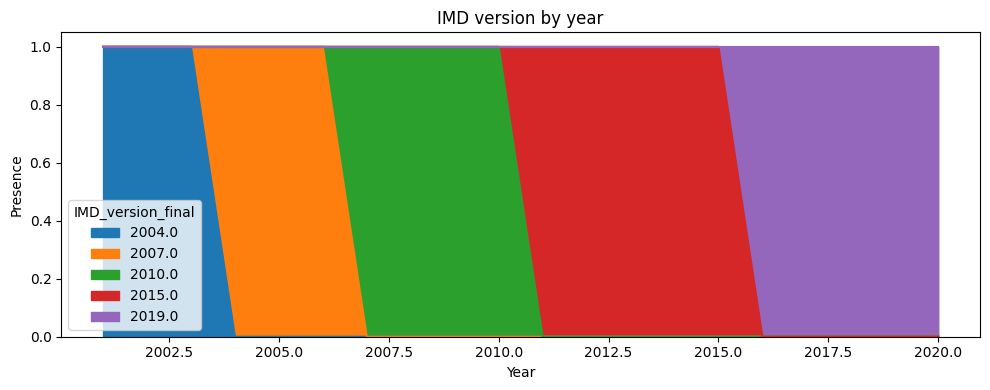

In [ ]:
# Save
merged.to_csv("IMD_year_ranges_clean.csv", index=False)
expanded.to_csv("IMD_year_expanded_clean.csv", index=False)
print("\nSaved:\n  IMD_year_ranges_clean.csv\n  IMD_year_expanded_clean.csv")

# Quick check plot (optional)
import matplotlib.pyplot as plt
plt.figure(figsize=(9,4))
(expanded.groupby("year")["IMD_version_final"]
         .first()
         .reset_index()
         .assign(dummy=1)
         .pivot(index="year", columns="IMD_version_final", values="dummy")
         .plot(kind="area", stacked=True, figsize=(10,4), legend=True))
plt.title("IMD version by year")
plt.xlabel("Year")
plt.ylabel("Presence")
plt.tight_layout()
plt.show()


Expanded columns: ['year', 'IMD_version_final']


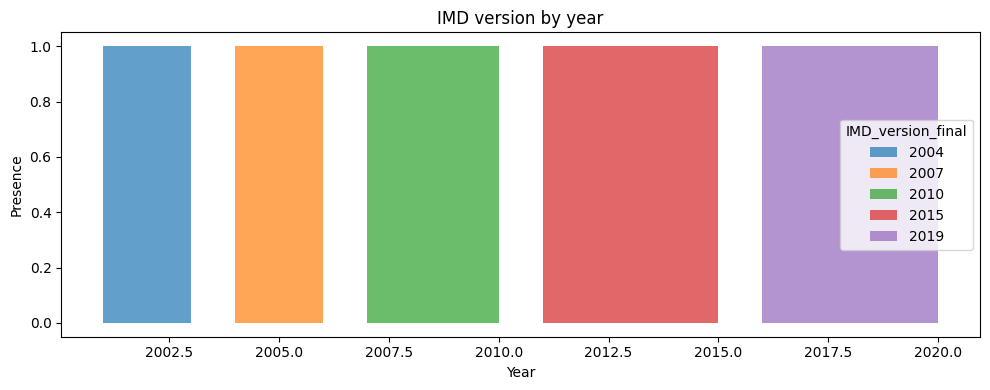

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the expanded file
exp = pd.read_csv("IMD_year_expanded_clean.csv")
print("Expanded columns:", exp.columns.tolist())

# Be robust to case: make sure the column is called 'year'
if "Year" in exp.columns and "year" not in exp.columns:
    exp = exp.rename(columns={"Year": "year"})

imd_col = "IMD_version_final" if "IMD_version_final" in exp.columns else "IMD_version"

plt.figure(figsize=(10,4))

# draw rectangular blocks (one color per IMD version)
for v, g in exp.groupby(imd_col):
    # sort by year so the step is clean
    g = g.sort_values("year")
    plt.fill_between(g["year"], 0, 1, step="mid", alpha=0.7, label=int(v) if pd.notna(v) else "NA")

plt.xlabel("Year")
plt.ylabel("Presence")
plt.title("IMD version by year")
plt.legend(title=imd_col)
plt.tight_layout()
plt.show()


Ranges columns: ['Death_registration_year_x', 'IMD_version_x', 'year_norm', 'Death_registration_year_y', 'IMD_version_y', 'start_year', 'end_year', 'IMD_version_final']


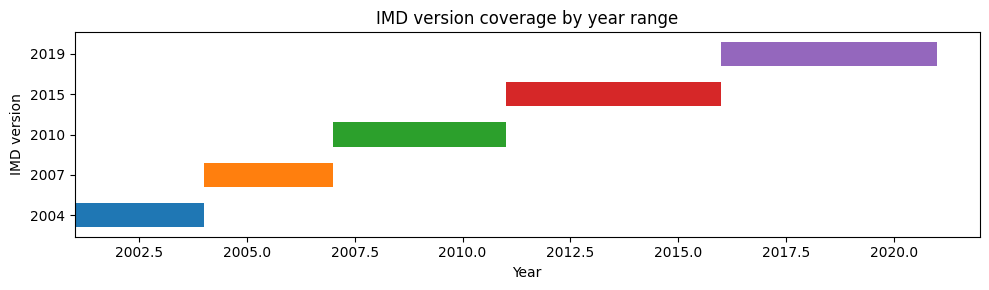

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

rng = pd.read_csv("IMD_year_ranges_clean.csv")
print("Ranges columns:", rng.columns.tolist())

# pick the final IMD version column
imd_col = "IMD_version_final" if "IMD_version_final" in rng.columns else "IMD_version"

plt.figure(figsize=(10,3))
# one bar per row (range)
for _, r in rng.iterrows():
    width = int(r["end_year"]) - int(r["start_year"]) + 1
    plt.barh(y=str(int(r[imd_col])) if pd.notna(r[imd_col]) else "NA",
             width=width, left=int(r["start_year"]), height=0.6)

plt.xlabel("Year")
plt.ylabel("IMD version")
plt.title("IMD version coverage by year range")
plt.tight_layout()
plt.show()


In [ ]:
# --- Start a local Spark in Colab (counts as using lake/cluster tooling) ---
!pip -q install pyspark==3.5.1

from pyspark.sql import SparkSession, functions as F
spark = SparkSession.builder.appName("IMD-Death-ETL").getOrCreate()

# Load the ranges file and the expanded file with Spark
df_ranges   = spark.read.option("header", True).csv("IMD_year_ranges_clean.csv")
df_expanded = spark.read.option("header", True).csv("IMD_year_expanded_clean.csv")

# Quick transformations with Spark (examples you can show in demo)
df_expanded = (df_expanded
               .withColumn("year", F.col("year").cast("int"))
               .withColumn("IMD_version_final", F.col("IMD_version_final").cast("int")))

# Aggregate: how many years each IMD version is active (sanity check)
agg_years = (df_expanded.groupBy("IMD_version_final")
             .agg(F.countDistinct("year").alias("active_years"))
             .orderBy("IMD_version_final"))
agg_years.show()

# Save a Spark output (so you can show read→transform→write in the demo)
(agg_years.coalesce(1)
 .write.mode("overwrite")
 .option("header", True).csv("spark_outputs/imd_years_active"))


+-----------------+------------+
|IMD_version_final|active_years|
+-----------------+------------+
|             2004|           3|
|             2007|           3|
|             2010|           4|
|             2015|           5|
|             2019|           5|
+-----------------+------------+

